In [1]:
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from itertools import cycle
import matplotlib.pyplot as plt
from numpy import interp
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
import os
import xgboost as xgb
from sklearn.preprocessing import label_binarize

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def plotROC(n_classes,y_test,y_score):
    # 计算
    fpr, tpr, thread = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    # 绘图
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('roc.png',)
    plt.show()

# 计算准确率
def calculate_all_prediction(confMatrix):
    '''
    计算总精度,对角线上所有值除以总数
    :return:
    '''
    total_sum = confMatrix.sum()
    correct_sum = (np.diag(confMatrix)).sum()
    prediction = round(100 * float(correct_sum) / float(total_sum), 2)
    print('准确率:' + str(prediction) + '%')


def calculae_lable_prediction(confMatrix):
    '''
    计算每一个类别的预测精度:该类被预测正确的数除以该类的总数
    '''
    l = len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=1)[i]
        label_correct_sum = confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('精确率: {0} : {1} %'.format(i, prediction))

def calculate_label_recall(confMatrix):
    l = len(confMatrix)
    for i in range(l):
        label_total_sum = confMatrix.sum(axis=0)[i]
        label_correct_sum = confMatrix[i][i]
        prediction = round(100 * float(label_correct_sum) / float(label_total_sum), 2)
        print('召回率: {0} : {1} %'.format(i, prediction))

In [3]:
file = '代谢组数据 - 填充 by min - 副本.csv'
df = pd.read_csv(file,engine='python')
features=df.columns.tolist()

feat_labels = df.columns[5:]
X=df[features[6:]]
y=df[features[4]]


pd.DataFrame(y)
pd.DataFrame(X)

,Pyridoxamine,Pyroglutamic acid,Serine,Stearoylcarnitine,Taurine,Threonine,Trigonelline,Trimethylamine-N-oxide,Tryptophan,Tyrosine,...,GlcCer(d18:1/24:0),GlcCer(d18:1/16:0),Glucosylsphingosine,GlcCer(d18:2/18:0),GlcCer(d18:2/20:0),GlcCer(d18:1/18:0),GlcCer(d18:1/22:1),GalCer(d18:1/16:0),GalCer(d18:2/20:0),GalCer(d18:2/18:0)
0,0.386372,4.439822,12.203752,0.004416,0.183362,9.849501,4.184259,1.483083,0.236850,0.021520,...,0.125182,0.439909,0.003513,0.011922,0.016582,0.035013,0.023859,0.067132,0.006443,0.005938
1,0.352458,3.675633,16.053034,0.006717,0.288872,16.296357,0.496333,0.750501,0.328595,0.033050,...,0.118273,0.367976,0.003247,0.010075,0.021066,0.025433,0.014106,0.057368,0.008590,0.003784
2,0.423539,5.851551,11.493877,0.006867,0.180818,10.510558,1.460301,1.391092,0.254664,0.025265,...,0.133054,0.408712,0.004259,0.010649,0.016358,0.031509,0.013460,0.047338,0.003426,0.002022
3,0.384690,2.603791,7.777585,0.004890,0.257987,10.421462,1.729223,1.996201,0.193602,0.015359,...,0.134955,0.489322,0.002378,0.012418,0.018256,0.043480,0.022773,0.067491,0.005557,0.003623
4,0.525711,1.704007,5.750401,0.004696,0.218338,6.333874,0.419803,2.015289,0.191359,0.023564,...,0.157644,0.226438,0.001161,0.006708,0.007026,0.028222,0.008586,0.031376,0.002716,0.002063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,0.381003,3.219873,8.294481,0.009467,0.190167,9.785974,0.238144,0.992481,0.250589,0.018955,...,0.100250,0.312464,0.003434,0.006797,0.006273,0.029944,0.008235,0.030754,0.003728,0.002496
420,0.381962,4.243911,10.054089,0.005839,0.170939,11.130297,2.118894,1.918658,0.204853,0.009210,...,0.189809,0.491302,0.006147,0.007732,0.014660,0.033390,0.018832,0.073968,0.007032,0.006622
421,0.383401,3.329386,11.351226,0.005165,0.215383,10.826516,3.582773,0.933229,0.198223,0.019193,...,0.127828,0.357650,0.002990,0.005657,0.009929,0.025064,0.010088,0.071673,0.005497,0.003749
422,0.371568,3.315927,9.338606,0.008439,0.279232,11.244900,0.331485,1.284491,0.208336,0.021417,...,0.105910,0.294475,0.002072,0.006899,0.008220,0.025450,0.010124,0.035590,0.002237,0.001742


RF-RFE
#

In [4]:
# RFECV


from sklearn.svm import SVC

forest = RandomForestClassifier(criterion='gini',n_estimators=200,random_state=1,n_jobs=2,verbose=1)

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=forest,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      |

[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.4s f

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend 

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 26
全部特征等级 : [104, 163, 192, 182, 107, 55, 27, 43, 52, 125, 69, 177, 146, 86, 26, 101, 99, 9, 64, 111, 76, 1, 1, 122, 41, 137, 115, 15, 28, 57, 56, 73, 21, 62, 135, 136, 88, 29, 8, 81, 50, 114, 70, 7, 1, 117, 1, 12, 34, 2, 13, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 185, 161, 118, 83, 154, 1, 1, 1, 180, 211, 58, 138, 32, 176, 143, 126, 47, 96, 183, 54, 141, 174, 149, 134, 131, 203, 169, 60, 113, 92, 98, 85, 108, 87, 195, 22, 157, 197, 191, 186, 172, 190, 130, 89, 167, 33, 188, 151, 100, 110, 72, 178, 156, 102, 204, 166, 202, 1, 160, 19, 196, 90, 153, 20, 132, 181, 210, 48, 165, 44, 42, 35, 23, 144, 24, 173, 119, 139, 67, 93, 164, 112, 91, 46, 199, 168, 198, 105, 194, 3, 171, 121, 140, 193, 80, 18, 1, 1, 95, 77, 127, 25, 36, 155, 208, 158, 129, 4, 120, 145, 123, 37, 16, 78, 71, 209, 187, 201, 66, 17, 74, 152, 124, 189, 207, 5, 179, 175, 212, 31, 14, 184, 75, 106, 53, 148, 94, 133, 6, 170, 63, 45, 84, 59, 97, 65, 30, 206, 79

[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished


In [5]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['Paraxanthine', 'Piperine', '1-Methylxanthine', '3-Methoxytyrosine', 'Cystathionine', 'Histamine', '7-Methylxanthine', '3-Hydroxy-N6,N6,N6-Trimethyllysine', 'Dopamine 3-o-sulfate', 'Glutathione', 'Ascorbate', 'Dopa', 'Dopamine 4-o-sulfate', 'Putrescine', 'Erythose 4-phosphate', '3-Hydroxybutyric acid', 'Oxoglutaric acid', 'PC(40:5)', 'MG(18:0)', 'LPC(26:1)', 'PG(18:0_20:4)', 'BMP(22:6/22:6)', 'LPG(18:0)', 'PA(18:1/18:1)', 'LPG(16:0)', 'PG(16:0_20:4)']
交叉验证得分————————————————————————————————————————————
[0.94097453 0.93853821 0.95985604 0.9503876  0.96218162 0.9645072
 0.9645072  0.96456257 0.95980066 0.9645072  0.95980066 0.96218162
 0.96688815 0.9645072  0.9692691  0.96688815 0.96456257 0.96223699
 0.96694352 0.9692691  0.96694352 0.96461794 0.9692691  0.95991141
 0.9717608  0.95753045 0.96461794 0.96461794 0.96229236 0.95753045
 0.96234773 0.95282392 0.95991141 0.96223699 0.95991141 0.96229236
 0.96223699 0.95753045 0.95753045 0.95991141 0.95753045 0.95044297
 0.95758583 0.95747508 0

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      |

特征排序结果——————————————————————————————————————————————————
 1) Putrescine                     0.455643
 2) 3-Methoxytyrosine              0.210623
 3) MG(18:0)                       0.082763
 4) Dopamine 4-o-sulfate           0.033045
 5) Paraxanthine                   0.026847
 6) LPG(16:0)                      0.023677
 7) PG(16:0_20:4)                  0.018359
 8) Ascorbate                      0.015446
 9) 3-Hydroxy-N6,N6,N6-Trimethyllysine 0.015426
10) 3-Hydroxybutyric acid          0.015157
11) PG(18:0_20:4)                  0.012106
12) Oxoglutaric acid               0.010242
13) Dopamine 3-o-sulfate           0.009972
14) 1-Methylxanthine               0.009321
15) PA(18:1/18:1)                  0.009213
16) LPG(18:0)                      0.006668
17) Piperine                       0.006547
18) BMP(22:6/22:6)                 0.005841
19) Erythose 4-phosphate           0.005279
20) Glutathione                    0.005124
21) PC(40:5)                       0.004879
22) LPC(26:1)  

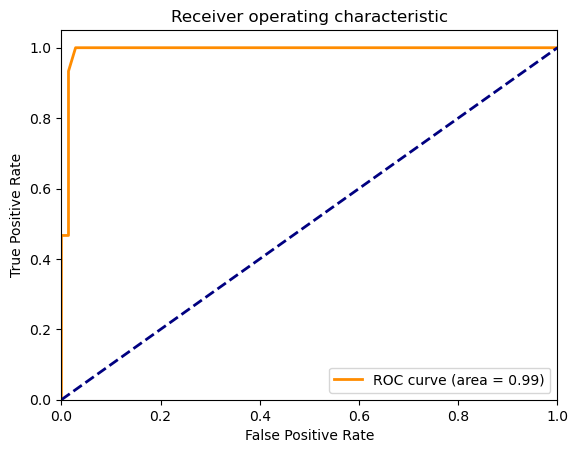

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 174 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done 197 out of 200 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Usi

交叉验证得分：
[0.94117647 0.97058824 0.94117647 0.94117647 1.         0.97058824
 0.91176471 0.85294118 1.         0.96969697]
0.9499108734402852


[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.0s finished


In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini',max_features=25,n_estimators=200,random_state=1,n_jobs=2,verbose=1)
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.predict_proba(X_test)
plotROC(3,Y_test,y_score[:,1])

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())

XGB-RFE#

In [7]:
# RFECV
import xgboost as xgb

model = xgb.XGBClassifier( learning_rate =0.1,
 n_estimators=200,
 max_depth=5)

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 8
全部特征等级 : [32, 104, 44, 99, 97, 79, 95, 65, 29, 94, 98, 107, 110, 118, 120, 12, 101, 58, 113, 129, 112, 1, 16, 108, 49, 17, 123, 125, 56, 131, 96, 34, 74, 51, 100, 114, 89, 24, 132, 134, 38, 52, 140, 25, 2, 146, 1, 54, 59, 154, 21, 68, 50, 162, 10, 47, 1, 84, 1, 62, 1, 1, 179, 181, 184, 126, 72, 81, 15, 212, 215, 194, 9, 11, 200, 202, 204, 64, 42, 61, 216, 77, 219, 221, 190, 92, 195, 197, 205, 207, 41, 85, 53, 141, 69, 147, 149, 151, 155, 157, 159, 163, 165, 167, 169, 70, 173, 5, 87, 185, 187, 3, 209, 60, 40, 225, 227, 229, 230, 13, 133, 57, 109, 138, 139, 128, 143, 88, 145, 124, 31, 152, 153, 39, 46, 37, 45, 161, 35, 168, 170, 160, 188, 150, 137, 7, 136, 177, 102, 93, 105, 178, 180, 182, 91, 19, 103, 48, 1, 199, 201, 78, 206, 73, 210, 33, 213, 63, 217, 76, 174, 36, 86, 18, 82, 189, 191, 115, 111, 117, 43, 4, 30, 119, 214, 14, 220, 218, 71, 130, 171, 75, 176, 193, 198, 208, 196, 203, 192, 211, 172, 166, 20, 164, 15

In [8]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['Paraxanthine', '3-Methoxytyrosine', 'Dopamine 3-o-sulfate', 'Ascorbate', 'Dopamine 4-o-sulfate', 'Putrescine', 'MG(18:0)', 'PG(16:0_20:4)']
交叉验证得分————————————————————————————————————————————
[0.92696567 0.93870432 0.93859358 0.95991141 0.95996678 0.96461794
 0.97635659 0.96212625 0.95980066 0.95741971 0.96223699 0.96461794
 0.96699889 0.95520487 0.95758583 0.96223699 0.96694352 0.96456257
 0.95991141 0.95758583 0.96234773 0.96229236 0.95996678 0.95520487
 0.95753045 0.95991141 0.96229236 0.95753045 0.95991141 0.95753045
 0.9551495  0.9551495  0.95276855 0.95282392 0.95520487 0.95520487
 0.95520487 0.95753045 0.95991141 0.95991141 0.95520487 0.95758583
 0.95758583 0.95520487 0.95753045 0.95753045 0.95985604 0.95753045
 0.95758583 0.95520487 0.95520487 0.95520487 0.95520487 0.95282392
 0.95520487 0.95520487 0.95758583 0.95758583 0.95991141 0.96223699
 0.9551495  0.95753045 0.95753045 0.95985604 0.95985604 0.96218162
 0.96218162 0.96218162 0.95980066 0.95747508 0.95747508 0.95747508
 0.

特征排序结果——————————————————————————————————————————————————
 1) Putrescine                     0.359234
 2) 3-Methoxytyrosine              0.237514
 3) MG(18:0)                       0.138427
 4) Dopamine 4-o-sulfate           0.078378
 5) PG(16:0_20:4)                  0.071139
 6) Dopamine 3-o-sulfate           0.054683
 7) Paraxanthine                   0.052590
 8) Ascorbate                      0.008035
准确率:97.65%
精确率: 0 : 96.77 %
精确率: 1 : 100.0 %
召回率: 0 : 100.0 %
召回率: 1 : 92.0 %


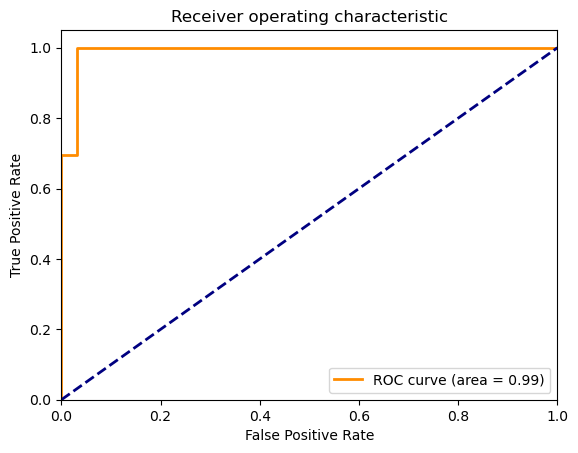

交叉验证得分：
[0.97058824 0.94117647 1.         0.97058824 0.97058824 0.97058824
 1.         1.         1.         0.96969697]
0.9793226381461675


In [9]:
model = xgb.XGBClassifier( learning_rate =0.1,
 n_estimators=200,
 max_depth=5)

model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.predict_proba(X_test)
plotROC(3,Y_test,y_score[:,1])

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())

SVM-RFE#

In [10]:
# RFECV
from sklearn import svm

model = svm.SVC(kernel = 'linear')

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 15
全部特征等级 : [123, 91, 109, 211, 174, 73, 102, 142, 106, 96, 18, 62, 82, 149, 182, 162, 144, 85, 157, 168, 169, 1, 1, 125, 181, 98, 201, 207, 206, 127, 3, 180, 192, 220, 103, 193, 131, 112, 31, 148, 5, 139, 146, 197, 72, 179, 1, 208, 183, 89, 70, 212, 100, 141, 4, 214, 1, 202, 77, 186, 1, 1, 188, 137, 84, 79, 185, 59, 119, 1, 58, 205, 209, 189, 170, 175, 29, 108, 135, 145, 53, 167, 19, 16, 81, 54, 83, 50, 66, 51, 97, 30, 33, 78, 32, 28, 132, 115, 221, 120, 171, 44, 215, 49, 173, 114, 118, 156, 204, 75, 10, 64, 150, 42, 6, 52, 143, 48, 55, 2, 46, 101, 105, 163, 11, 71, 195, 22, 47, 68, 69, 76, 67, 17, 178, 151, 34, 39, 40, 94, 13, 9, 140, 107, 12, 26, 93, 111, 153, 213, 7, 15, 196, 110, 219, 217, 222, 65, 187, 210, 136, 36, 147, 1, 1, 90, 177, 63, 129, 1, 56, 38, 8, 20, 122, 223, 133, 27, 43, 1, 24, 86, 126, 92, 128, 113, 99, 87, 134, 25, 176, 164, 35, 45, 14, 21, 57, 218, 1, 41, 155, 116, 61, 172, 23, 203, 165, 191, 

In [11]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['Paraxanthine', 'Piperine', '3-Methoxytyrosine', 'Dopamine 3-o-sulfate', 'Dopamine 4-o-sulfate', 'Putrescine', 'Oxoglutaric acid', '(3-O-sulfo)GalCer(d18:1/24:0(2OH))', '(3-O-sulfo)GalCer(d18:1/24:0)', 'CL(72:8-2(OOH)/18:2)', 'PE(O-18:0/22:6)', 'PI(18:0_22:6)', 'DHA', 'Linoleic acid', 'EPA']
交叉验证得分————————————————————————————————————————————
[0.71937984 0.72641196 0.73122924 0.72646733 0.71937984 0.71456257
 0.72630122 0.72419712 0.72657807 0.73355482 0.7265227  0.73133998
 0.73361019 0.74784053 0.74097453 0.74557032 0.74784053 0.74296788
 0.74307863 0.7452381  0.7452381  0.7406423  0.7406423  0.73106312
 0.72646733 0.7406423  0.74529347 0.73831672 0.74296788 0.73355482
 0.73355482 0.72884828 0.73361019 0.72663344 0.72414175 0.7196567
 0.71727575 0.70769657 0.71483942 0.70299003 0.70537099 0.70310078
 0.72192691 0.71256921 0.69363234 0.70077519 0.70315615 0.70315615
 0.70564784 0.70559247 0.7030454  0.69363234 0.69114064 0.70060908
 0.70055371 0.69579181 0.70753045 0.70991141 0.712292

特征排序结果——————————————————————————————————————————————————
(15,)
(15,)
 1) 3-Methoxytyrosine              2.938709
 2) (3-O-sulfo)GalCer(d18:1/24:0(2OH)) 1.399383
 3) Oxoglutaric acid               1.249599
 4) Dopamine 3-o-sulfate           1.147815
 5) CL(72:8-2(OOH)/18:2)           1.058954
 6) Dopamine 4-o-sulfate           0.936539
 7) Piperine                       0.933868
 8) PE(O-18:0/22:6)                0.909847
 9) DHA                            0.851253
10) PI(18:0_22:6)                  0.826787
11) Putrescine                     0.766877
12) Paraxanthine                   0.625735
13) EPA                            0.524327
14) Linoleic acid                  0.402886
15) (3-O-sulfo)GalCer(d18:1/24:0)  0.303492
准确率:74.12%
精确率: 0 : 96.49 %
精确率: 1 : 28.57 %
召回率: 0 : 73.33 %
召回率: 1 : 80.0 %


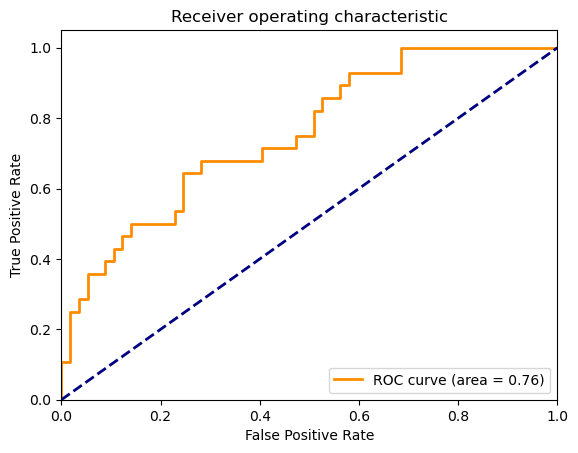

交叉验证得分：
[0.76470588 0.73529412 0.73529412 0.76470588 0.79411765 0.76470588
 0.76470588 0.79411765 0.82352941 0.81818182]
0.7759358288770053


In [12]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
coef = model.coef_
coef = np.abs(coef)
importances = np.sum(coef, axis=0)
indices = np.argsort(importances)[::-1] # 下标排序
print(importances.shape)
print(indices.shape)
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.decision_function(X_test)
plotROC(3,Y_test,y_score)

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())

GBM-RFE#

In [13]:
# RFECV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=model,  # 学习器
              min_features_to_select=2,  # 最小选择的特征数量
              step=1,  # 移除特征个数
              cv=StratifiedKFold(10),  # 交叉验证次数
              scoring='accuracy',  # 学习器的评价标准
              verbose=0,
              n_jobs=-1
              ).fit(X, y)
X_RFECV = rfecv.transform(X)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("有效特征个数 : %d" % rfecv.n_features_)
print("全部特征等级 : %s" % list(rfecv.ranking_))

RFECV特征选择结果——————————————————————————————————————————————————
有效特征个数 : 2
全部特征等级 : [219, 200, 197, 196, 193, 189, 186, 185, 169, 41, 33, 68, 105, 103, 211, 141, 145, 225, 45, 131, 82, 3, 96, 188, 76, 74, 218, 21, 98, 65, 116, 71, 214, 163, 201, 94, 178, 47, 90, 10, 115, 43, 175, 109, 152, 80, 100, 35, 39, 8, 165, 132, 62, 63, 199, 4, 138, 122, 135, 234, 67, 1, 31, 48, 85, 224, 176, 128, 5, 9, 184, 216, 60, 110, 182, 223, 157, 177, 75, 170, 148, 106, 162, 23, 83, 38, 202, 125, 171, 58, 161, 230, 236, 146, 156, 159, 180, 97, 137, 192, 232, 55, 229, 215, 134, 13, 49, 119, 136, 228, 73, 54, 121, 130, 32, 158, 191, 204, 235, 25, 221, 222, 30, 190, 46, 120, 78, 61, 187, 127, 133, 210, 166, 91, 84, 181, 140, 179, 173, 27, 17, 18, 26, 22, 29, 24, 11, 208, 112, 87, 160, 37, 206, 57, 108, 15, 50, 198, 1, 77, 123, 102, 150, 92, 147, 172, 126, 217, 149, 95, 34, 227, 114, 86, 56, 14, 213, 164, 89, 203, 212, 16, 93, 113, 81, 233, 118, 7, 69, 59, 44, 19, 151, 124, 207, 64, 143, 154, 111, 101, 144, 20,

In [14]:
selected_features = X.columns[rfecv.support_]
print(list(selected_features))
print("交叉验证得分————————————————————————————————————————————")
print(rfecv.cv_results_["mean_test_score"])
U=X[selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(U, y, test_size=0.2)

['Putrescine', 'MG(18:0)']
交叉验证得分————————————————————————————————————————————
[0.92912514 0.90775194 0.91987818 0.91273533 0.9127907  0.91517165
 0.91982281 0.91046512 0.9175526  0.9175526  0.91987818 0.91749723
 0.92214839 0.91511628 0.91976744 0.91744186 0.91749723 0.91273533
 0.9127907  0.91046512 0.91506091 0.91511628 0.91749723 0.91284607
 0.91517165 0.91987818 0.91749723 0.91517165 0.91517165 0.91517165
 0.91284607 0.91284607 0.9127907  0.91046512 0.91284607 0.90813953
 0.91517165 0.91046512 0.91284607 0.9127907  0.9127907  0.91046512
 0.9127907  0.91046512 0.9127907  0.9127907  0.91046512 0.9127907
 0.91046512 0.9127907  0.90575858 0.91046512 0.91046512 0.90808416
 0.9127907  0.9127907  0.90575858 0.9127907  0.9127907  0.90575858
 0.90808416 0.90813953 0.90808416 0.90808416 0.90802879 0.91511628
 0.91046512 0.91040975 0.91046512 0.90813953 0.91040975 0.90570321
 0.90808416 0.91046512 0.91040975 0.9127907  0.91040975 0.9175526
 0.91046512 0.91046512 0.91046512 0.90813953 0.912790

特征排序结果——————————————————————————————————————————————————
 1) Putrescine                     0.735421
 2) MG(18:0)                       0.264579
准确率:91.76%
精确率: 0 : 94.74 %
精确率: 1 : 85.71 %
召回率: 0 : 93.1 %
召回率: 1 : 88.89 %


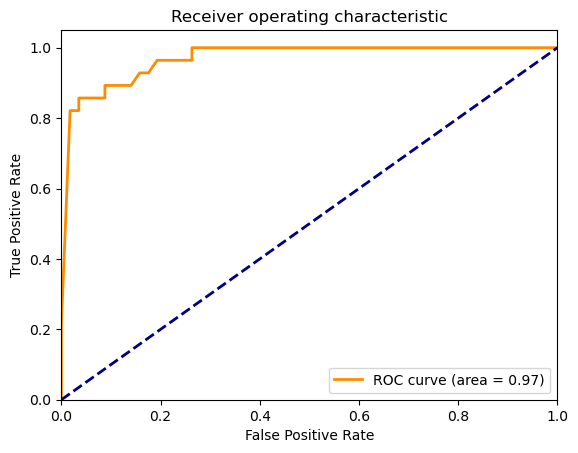

交叉验证得分：
[0.88235294 0.97058824 0.97058824 0.97058824 1.         0.94117647
 0.88235294 0.91176471 0.91176471 0.90909091]
0.9350267379679144


In [15]:

model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
model.fit(X_train, Y_train)
score = model.score(X_test, Y_test)
print("特征排序结果——————————————————————————————————————————————————")
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] # 下标排序
for f in range(X_train.shape[1]):   # x_train.shape[1]=13
    print("%2d) %-*s %f" % \
          (f + 1, 30, selected_features[indices[f]], importances[indices[f]]))
predictions=model.predict(X_test)
cm = confusion_matrix(y_true=Y_test, y_pred=predictions)
calculate_all_prediction(cm)
calculae_lable_prediction(cm)
calculate_label_recall(cm)
y_score = model.predict_proba(X_test)
plotROC(3,Y_test,y_score[:,1])

scores = cross_val_score(model, X_train, Y_train, cv=10)  #cv为迭代次数。
print("交叉验证得分：")
print(scores)
print(scores.mean())